## This notebook contains visualization and exploration of the boston housing dataset.

Linear regression will be used to determine the weight of each feature in median housing prices.

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town 
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per  10,000 dollars
- PT RATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - percentage lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

## Importing libraries 

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

## Loading the data

In [133]:
df = pd.read_csv('housing.csv')

In [134]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [135]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

## Changing the names to readable columns

In [136]:

new_columns = ["crime-rate", "zoned for lots", "industry", "bound river",
"nitric-oxide", "number of rooms", "property age", "near employment-center",
"radial-highways", "property-tax", "pupil-teach-ratio",
"proportion-black-families", "poor-people", "median-value"]

df.columns=new_columns

## Checking statistics and null values

In [137]:
df.describe()

,crime-rate,zoned for lots,industry,bound river,nitric-oxide,number of rooms,property age,near employment-center,radial-highways,property-tax,pupil-teach-ratio,proportion-black-families,poor-people,median-value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


[[<AxesSubplot:title={'center':'crime-rate'}>
  <AxesSubplot:title={'center':'zoned for lots'}>
  <AxesSubplot:title={'center':'industry'}>
  <AxesSubplot:title={'center':'bound river'}>]
 [<AxesSubplot:title={'center':'nitric-oxide'}>
  <AxesSubplot:title={'center':'number of rooms'}>
  <AxesSubplot:title={'center':'property age'}>
  <AxesSubplot:title={'center':'near employment-center'}>]
 [<AxesSubplot:title={'center':'radial-highways'}>
  <AxesSubplot:title={'center':'property-tax'}>
  <AxesSubplot:title={'center':'pupil-teach-ratio'}>
  <AxesSubplot:title={'center':'proportion-black-families'}>]
 [<AxesSubplot:title={'center':'poor-people'}>
  <AxesSubplot:title={'center':'median-value'}> <AxesSubplot:>
  <AxesSubplot:>]]


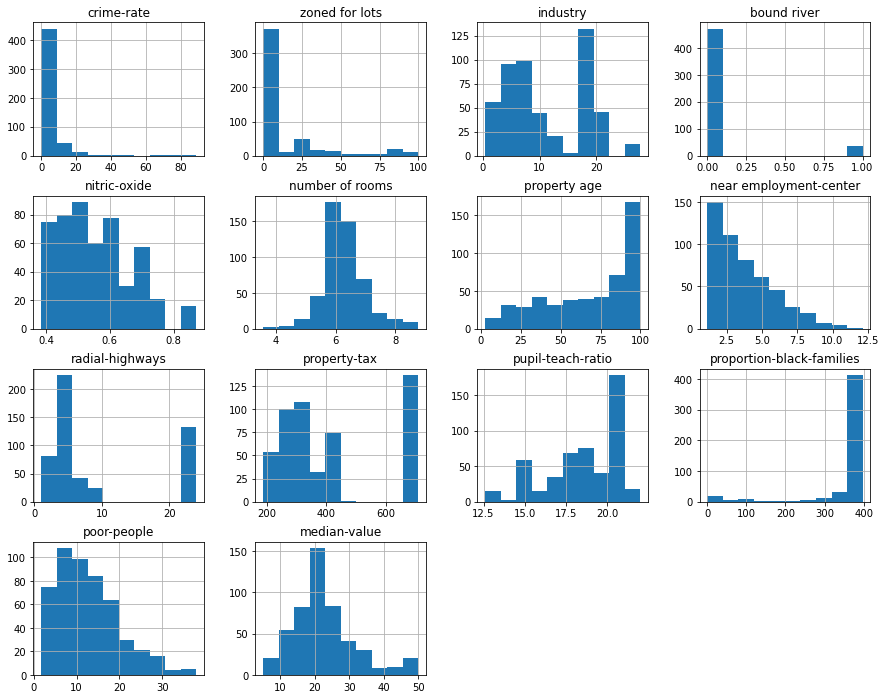

In [167]:
hists=df[new_columns].hist(layout=(4,4), figsize=(15,12))
print(hists)

Histogram analysis show that part of the data is highly skewed (property age, proportion-black-families, near employment-center, crime rate, zoned for lots) and will require normalization.

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   crime-rate                 506 non-null    float64
 1   zoned for lots             506 non-null    float64
 2   industry                   506 non-null    float64
 3   bound river                506 non-null    int64  
 4   nitric-oxide               506 non-null    float64
 5   number of rooms            506 non-null    float64
 6   property age               506 non-null    float64
 7   near employment-center     506 non-null    float64
 8   radial-highways            506 non-null    int64  
 9   property-tax               506 non-null    float64
 10  pupil-teach-ratio          506 non-null    float64
 11  proportion-black-families  506 non-null    float64
 12  poor-people                506 non-null    float64
 13  median-value               506 non-null    float64

In [183]:
correlation = df.corr()
correlation["median-value"].sort_values(ascending=False)

median-value                 1.000000
number of rooms              0.695360
zoned for lots               0.360445
proportion-black-families    0.333461
near employment-center       0.249929
bound river                  0.175260
property age                -0.376955
radial-highways             -0.381626
crime-rate                  -0.388305
nitric-oxide                -0.427321
property-tax                -0.468536
industry                    -0.483725
pupil-teach-ratio           -0.507787
poor-people                 -0.737663
Name: median-value, dtype: float64

Number of rooms has high correlation with median value prices and poor people presents high negative correlation with median value prices.

## Preparing Linear regression

In [202]:
#Target to predict

y = df["median-value"]


# Features

X = df.loc[:, df.columns != "median-value"]

In [203]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [205]:
list(zip(df.columns[:-1], lr.coef_))

[('crime-rate', -0.11305592398537892),
 ('zoned for lots', 0.030110464145646984),
 ('industry', 0.04038072041333593),
 ('bound river', 2.784438203507977),
 ('nitric-oxide', -17.20263339178146),
 ('number of rooms', 4.438835199513044),
 ('property age', -0.0062963622109802695),
 ('near employment-center', -1.4478653685307883),
 ('radial-highways', 0.2624297355850845),
 ('property-tax', -0.010646786275308188),
 ('pupil-teach-ratio', -0.9154562404680748),
 ('proportion-black-families', 0.012351334729969462),
 ('poor-people', -0.5085714244487943)]

In [139]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_pred = lr.predict(X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

4.928602182665353

<AxesSubplot:title={'center':'Influence of features on price'}, ylabel='Coeficient of influence on price'>

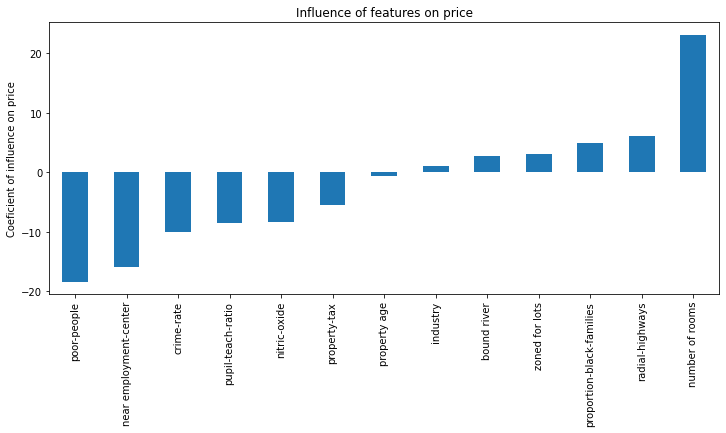

In [189]:
coeficients=pd.DataFrame(lr.coef_, columns=["Coefficient of influence on price"], index= df.columns[:-1])
coeficient=coeficients.sort_values("Coefficient of influence on price")
coeficient.plot(figsize=(12,5), kind='bar', legend=False, title= "Influence of features on price",
              ylabel="Coeficient of influence on price",)

Influence of each feature in the median values price

## Plotting correlation for the highest influencers on price (negative and positive)

(-0.7376627261740148, 5.08110339438697e-88)

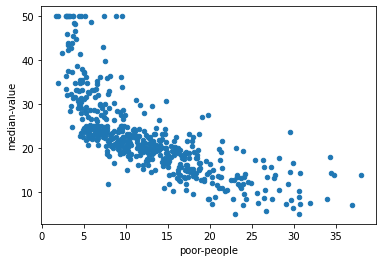

In [213]:
from scipy.stats import pearsonr
df.plot(x='poor-people', y='median-value', kind='scatter')
pearsonr(df['poor-people'], df['median-value'])

(0.6953599470715393, 2.487228871007442e-74)

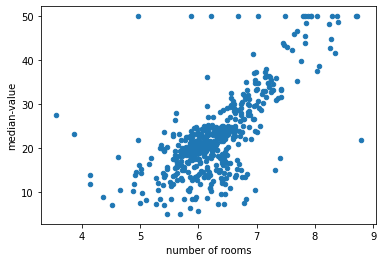

In [212]:
df.plot(x='number of rooms', y='median-value', kind='scatter')
pearsonr(df['number of rooms'], df['median-value'])

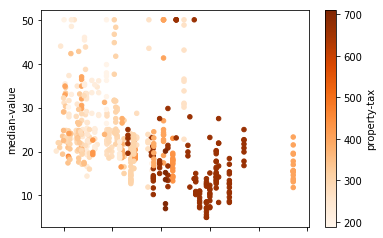

In [29]:
df.plot(x='nitric-oxide', y='median-value', c='property-tax',
colormap='Oranges', kind='scatter')

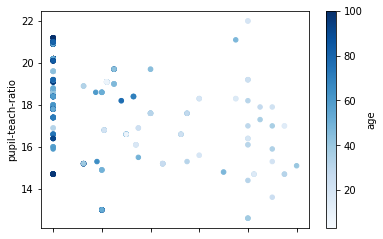

In [30]:
df.plot(x='zoned', y='pupil-teach-ratio', c='age',
colormap='Blues', kind='scatter')

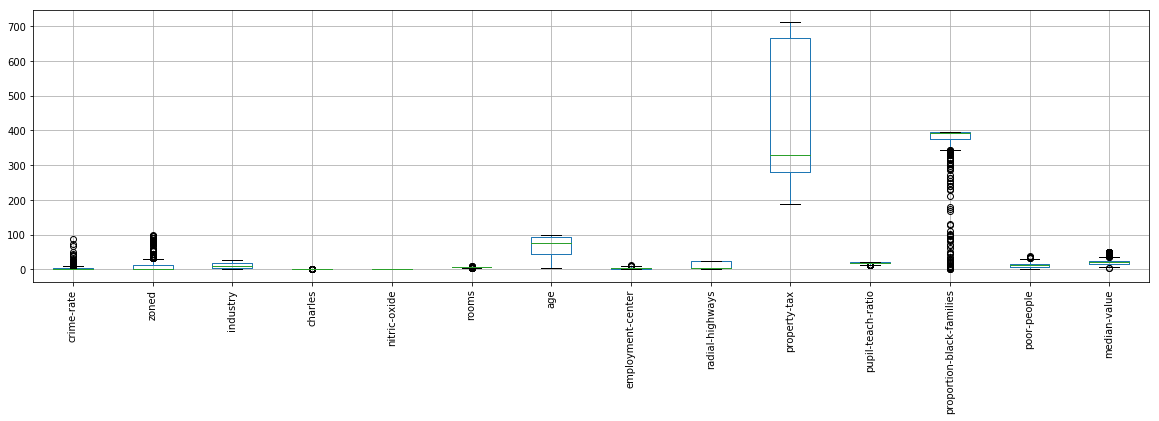

In [31]:
df.boxplot(figsize=(20,5), rot=90)

Boxplot shows data with large difference in absolute values, requiring normalization.

## Normalizing data

<AxesSubplot:>

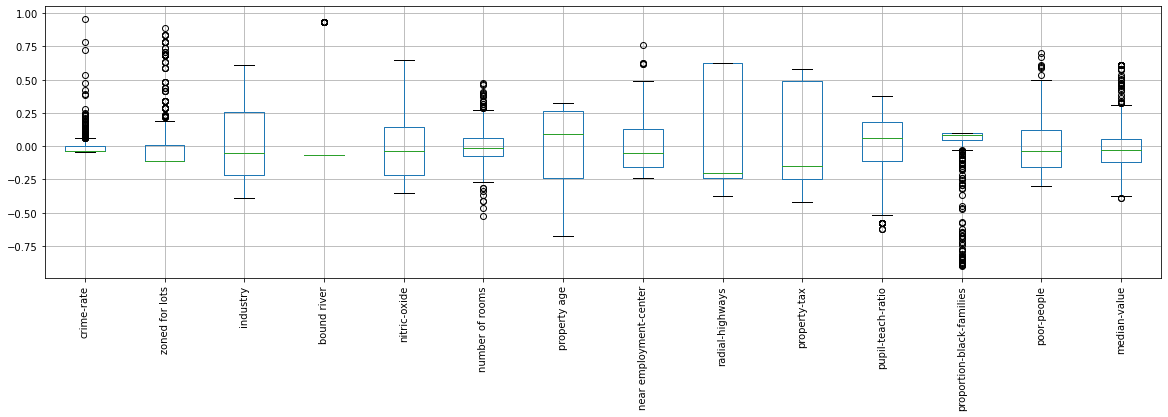

In [214]:
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm.boxplot(figsize=(20,5), rot=90)

In [190]:
df_norm

,crime-rate,zoned for lots,industry,bound river,nitric-oxide,number of rooms,property age,near employment-center,radial-highways,property-tax,pupil-teach-ratio,proportion-black-families,poor-people,median-value
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729,0.032604
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939,-0.020729
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943,0.270382
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021,0.241493
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071,0.303715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.039911,-0.113636,0.029077,-0.06917,0.037664,0.059085,0.005408,-0.119710,-0.371713,-0.258086,0.270688,0.089051,-0.082314,-0.002951
502,-0.040106,-0.113636,0.029077,-0.06917,0.037664,-0.031545,0.083678,-0.137088,-0.371713,-0.258086,0.270688,0.101432,-0.098594,-0.042951
503,-0.039932,-0.113636,0.029077,-0.06917,0.037664,0.132471,0.230948,-0.148000,-0.371713,-0.258086,0.270688,0.101432,-0.193517,0.030382
504,-0.039383,-0.113636,0.029077,-0.06917,0.037664,0.097598,0.213441,-0.127867,-0.371713,-0.258086,0.270688,0.092733,-0.170338,-0.011840


## Linear regression with normalized data

In [207]:
y = df_norm["median-value"]


# Features

X = df_norm.loc[:, df_norm.columns != "median-value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [208]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [209]:
list(zip(df.columns[:-1], lr.coef_))

[('crime-rate', -0.2235238220059619),
 ('zoned for lots', 0.06691214254588496),
 ('industry', 0.024479690063907135),
 ('bound river', 0.061876404522399585),
 ('nitric-oxide', -0.1857884406312385),
 ('number of rooms', 0.5148062423613015),
 ('property age', -0.013586150459696708),
 ('near employment-center', -0.3538229038043603),
 ('radial-highways', 0.1341307537434889),
 ('property-tax', -0.12397591129470151),
 ('pupil-teach-ratio', -0.1912286368977756),
 ('proportion-black-families', 0.1088509406046916),
 ('poor-people', -0.40956952048942774)]

In [196]:
y_pred = lr.predict(X_test)
rmse_model = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_model

0.10952449294811854